In [1]:
'''This Notebook generates Figure 3a-c for the MIST manuscript'''
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
data_names = ['Human_Breast_Cancer_BAS1', 'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE',
              'Human_Breast_Cancer_BAS2', 'Human_Breast_Cancer_Ductal_Carcinoma_FFPE','Human_Glioblastoma', 
              'Melanoma', 'MouseAD', 'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 
              'MouseWT', 'Human_Colorectal_Cancer','Human_Prostate_Cancer_Adenocarcinoma_FFPE','Prostate']

data_shorts = dict(zip(data_names, ['HBCB1', 'HPCACCF',
                                    'HBCB2', 'HBCDC', 'HG',
                                    'Melanoma', 'MouseAD', 'HIDC', 'HOC',
                                    'MouseWT', 'HCC', 'HPCA', 'Prostate']))

data_order = ['Human_Breast_Cancer_BAS1', 'Human_Breast_Cancer_BAS2',  'Human_Breast_Cancer_Ductal_Carcinoma_FFPE',             
              'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE', 'Human_Prostate_Cancer_Adenocarcinoma_FFPE',
              'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 'Human_Glioblastoma', 'Human_Colorectal_Cancer', 
              'Melanoma', 'MouseAD', 'MouseWT', 'Prostate']

data_order = [data_shorts[dn] for dn in data_order]

run_in_houston = ['Human_Breast_Cancer_BAS1','Human_Breast_Cancer_BAS2','Human_Ovarian_Cancer', 'Melanoma', 'Prostate']



In [3]:
slide_perfs = []
for dn in data_names:
#     if dn in run_in_houston:
#         dataDir = '../data'
#     else:
#         dataDir = '../data_other_servers'
    dataDir = '/home/humble_local2_25t/alexw/MIST_round3/MIST_additional_holdout/data/'
    fn = f"{dataDir}/{dn}/performance/slide_level_results.csv"
    df = pd.read_csv(fn)
    df["data"] = data_shorts[dn]
    df["data_full_name"] = dn
    slide_perfs.append(df)
slide_perfs = pd.concat(slide_perfs)

In [4]:
from scipy.stats import ttest_rel

### MIST's performance as compared to others
## Printed values are: model to be compared, percenta
r1 = slide_perfs.loc[slide_perfs.ModelName=='MIST', 'PCC'].to_numpy()
rmse1 = slide_perfs.loc[slide_perfs.ModelName=='MIST', 'RMSE'].to_numpy()

for model in ['MAGIC', 'knnSmooth', 'mcImpute', 'spKNN']:
#     for data in ['MouseWT', 'MouseAD', 'Melanoma'']
    r2 = slide_perfs.loc[slide_perfs.ModelName==model, 'PCC'].to_numpy()
    pr = ttest_rel(r1, r2)[1]
    rmse2 = slide_perfs.loc[slide_perfs.ModelName==model, 'RMSE'].to_numpy()
    prmse = ttest_rel(rmse1, rmse2)[1]
    r1_mean, r2_mean, rmse1_mean, rmse2_mean = np.mean(r1), np.mean(r2), np.mean(rmse1), np.mean(rmse2)
    print(f"MIST vs {model}, \n\t{(100 * (r1_mean-r2_mean)/r2_mean):.2f}% increased PCC (P={pr}),\
 \n\t{(100 * (rmse2_mean-rmse1_mean)/rmse2_mean):.2f}% decreased RMSE (P = {prmse}) ")

MIST vs MAGIC, 
	7.69% increased PCC (P=1.9410810833005293e-30), 
	25.74% decreased RMSE (P = 8.525151080121443e-55) 
MIST vs knnSmooth, 
	122.07% increased PCC (P=4.027152542661478e-74), 
	69.46% decreased RMSE (P = 7.371835520130999e-66) 
MIST vs mcImpute, 
	7.89% increased PCC (P=2.545213282438441e-30), 
	12.96% decreased RMSE (P = 8.24105728648302e-26) 
MIST vs spKNN, 
	54.95% increased PCC (P=1.052179127708066e-37), 
	61.45% decreased RMSE (P = 1.1255735472153382e-37) 


## SLIDE LEVEL PERFORMANCE

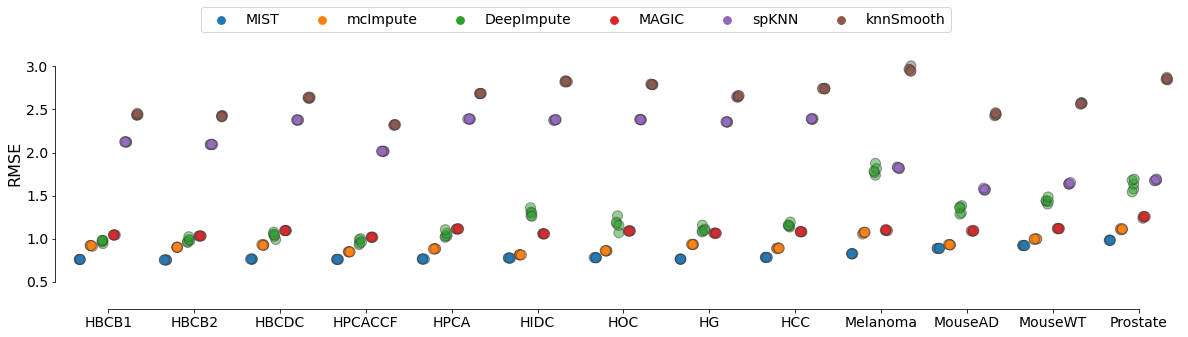

In [36]:
f1, ax = plt.subplots(1,1,figsize=(20, 5))
hue_order = ['MIST', 'mcImpute', 'DeepImpute', 'MAGIC', 'spKNN', 'knnSmooth']
sns.stripplot(data=slide_perfs, x='data', y='RMSE', hue='ModelName', 
            order=data_order, hue_order=hue_order, ax=ax, 
              dodge=True, edgecolor='gray', 
              alpha=0.5, size=10, linewidth=1)

# sns.stripplot(data=slide_perfs, x='data', y='RMSE',
#               hue='ModelName', order=data_order,
#               hue_order=hue_order,
#              dodge=True, ec='black',
#               color='white', size=8, ax=ax)

plt.xlabel("")
plt.legend(bbox_to_anchor=(0.8,1.1), 
           ncol=int(len(set(slide_perfs.ModelName))), 
           fontsize=14, frameon=True)
plt.margins(y=0.2)
sns.despine(offset=10, trim=True);
plt.tick_params(axis='both', labelsize=14)
plt.ylabel("RMSE", fontsize=16)
plt.savefig("Fig3a_holout_slide_RMSE.png", dpi=300, bbox_inches='tight')

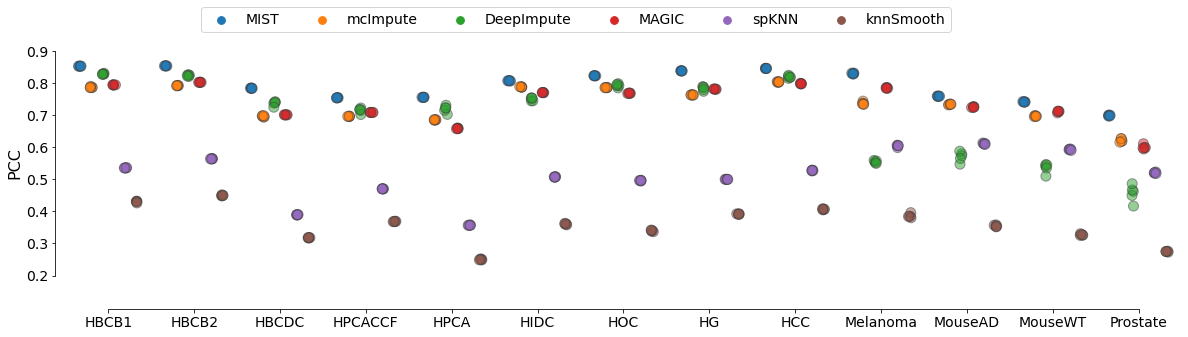

In [50]:
f2, ax2 = plt.subplots(1,1,figsize=(20, 5))
#sns.barplot(data=slide_perfs, x='data', y='PCC', hue='ModelName', order=data_order, hue_order=hue_order)
sns.stripplot(data=slide_perfs, x='data', y='PCC', hue='ModelName', 
            order=data_order, hue_order=hue_order, ax=ax2, 
              dodge=True, edgecolor='gray', 
              alpha=0.5, size=10, linewidth=1)
plt.xlabel("")
#plt.legend(loc=1, ncol=len(set(slide_perfs.ModelName)), fontsize=14, frameon=False)
plt.legend(bbox_to_anchor=(0.8,1.1),
           ncol=int(len(set(slide_perfs.ModelName))),
           fontsize=14, frameon=True)
#plt.legend(loc=1, fontsize=15, frameon=True, ncol=int(len(set(slide_perfs.ModelName))))
plt.margins(y=0.2)
plt.tick_params(axis='both', labelsize=14)
plt.ylabel("PCC", fontsize=16)
sns.despine(offset=10, trim=True);
plt.savefig("Fig3b_holout_slide_PCC.png", dpi=300, bbox_inches='tight')

## GENE LEVEL Performance

In [5]:
gene_perfs = []
dataDir = '/home/humble_local2_25t/alexw/MIST_round3/MIST_additional_holdout/data/'
for dn in data_names:
    fn = f"{dataDir}/{dn}/performance/gene_level_results.csv"
    df = pd.read_csv(fn)
    df["data"] = data_shorts[dn]
    df["data_full_name"] = dn
    gene_perfs.append(df)
gene_perfs = pd.concat(gene_perfs)
gene_perfs['Sparsity (Zero %)'] = (gene_perfs['mr'].round(1) * 100).astype(int)

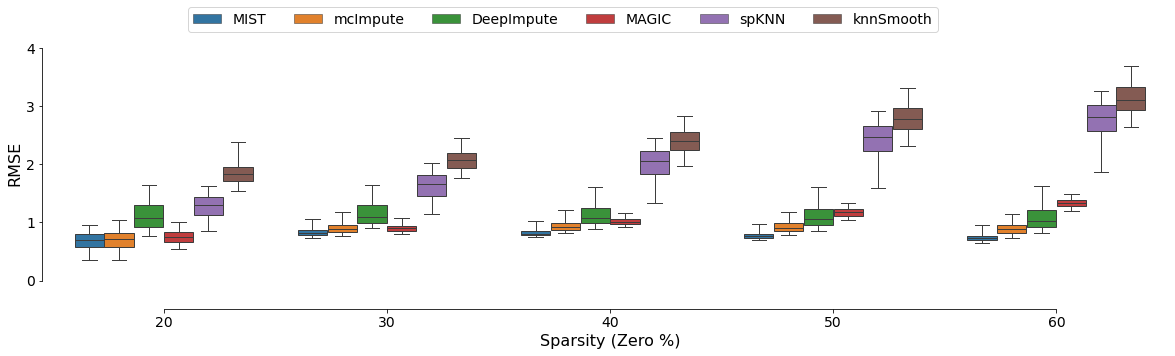

In [54]:
f3, ax3 = plt.subplots(1, 1, figsize=(20, 5))
#sns.barplot(data=gene_perfs, x='Sparsity (Zero %)', y='rmse', hue='model', hue_order=hue_order)
sns.boxplot(data=gene_perfs, x='Sparsity (Zero %)', y='rmse', hue='model', whis=[5, 95], 
            hue_order=hue_order, ax=ax3, 
              dodge=True,  linewidth=1,  
            showfliers=False)

#plt.legend(loc=1)
plt.tick_params(labelsize=14, axis='both')
plt.ylabel("RMSE", fontsize=16)
plt.xlabel('Sparsity (Zero %)', fontsize=16)
plt.legend(ncol=len(set(slide_perfs.ModelName)), bbox_to_anchor=(0.8,1.1), fontsize=14, frameon=True)
plt.margins(y=0.2)
sns.despine(offset=10, trim=True);
plt.savefig("Fig3c_holout_gene_by_sparsity_RMSE.png", dpi=200, bbox_inches='tight')

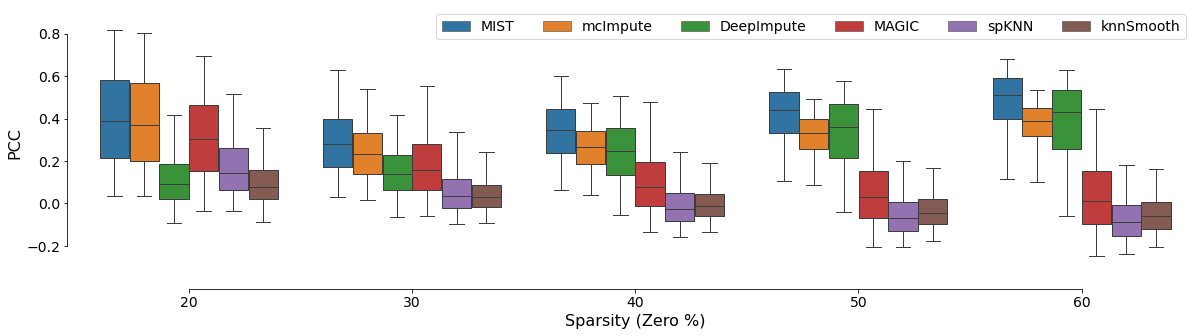

In [7]:
f4, ax4 = plt.subplots(1, 1, figsize=(20, 5))
hue_order = ['MIST', 'mcImpute', 'DeepImpute', 'MAGIC', 'spKNN', 'knnSmooth']
#sns.barplot(data=gene_perfs, x='Sparsity (Zero %)', y='pcc', hue='model', hue_order=hue_order)
sns.boxplot(data=gene_perfs, x='Sparsity (Zero %)', y='pcc', hue='model', whis=[5, 95], 
            hue_order=hue_order, ax=ax4, 
              dodge=True,  linewidth=1,  
            showfliers=False)


plt.legend(loc=1)
plt.tick_params(labelsize=14, axis='both')
plt.ylabel("PCC", fontsize=16)
plt.xlabel('Sparsity (Zero %)', fontsize=16)
plt.legend(ncol=len(set(slide_perfs.ModelName)), loc=1, fontsize=14, frameon=True)
plt.margins(y=0.1)
sns.despine(offset=10, trim=True);
plt.savefig("SuppFig3_holout_gene_sparsity_pcc.png", dpi=200, bbox_inches='tight')

In [58]:
for sps in range(2, 7):
    print(sps*10, len(set(gene_perfs.loc[gene_perfs['Sparsity (Zero %)'] == sps*10, 'gene'])))

20 2078
30 4061
40 5761
50 8077
60 6078


In [24]:
src_data_2c = []
for method in hue_order:
    gsp = gene_perfs.loc[gene_perfs.model==method].groupby("Sparsity (Zero %)").mean()
    gsp['model'] = method
    gsp = gsp[['model', 'rmse', 'pcc']]
    src_data_2c.append(gsp)
src_data_2c = pd.concat(src_data_2c)

In [25]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('fig3a-c_source_data.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
slide_perfs.reset_index(drop=True, inplace=True)
slide_perfs.to_excel(writer, sheet_name='Fig3ab')
src_data_2c.reset_index(drop=False, inplace=True)
src_data_2c.to_excel(writer, sheet_name='Fig3c')
writer.save()

In [21]:
gene_perfs

,Unnamed: 0,gene,rmse,pcc,snr,mape,model,mr,cvFold,data,data_full_name,Sparsity (Zero %)
0,0,NOC2L,0.815215,0.560920,3.263027,0.112377,MIST,0.493283,0,HBCB1,Human_Breast_Cancer_BAS1,50
1,1,HES4,0.788213,0.480264,3.539482,0.094268,MIST,0.350081,0,HBCB1,Human_Breast_Cancer_BAS1,40
2,2,ISG15,0.493030,0.747453,4.803668,0.037019,MIST,0.201236,0,HBCB1,Human_Breast_Cancer_BAS1,20
3,3,AGRN,0.753656,0.546294,3.382590,0.103426,MIST,0.544331,0,HBCB1,Human_Breast_Cancer_BAS1,50
4,4,TNFRSF18,0.706214,0.682361,3.357922,0.103247,MIST,0.578452,0,HBCB1,Human_Breast_Cancer_BAS1,60
...,...,...,...,...,...,...,...,...,...,...,...,...
1230945,1713,CUEDC2 ENSG00000107874,1.639475,0.044942,2.645928,0.180483,DeepImpute,0.586207,4,Prostate,Prostate,60
1230946,1714,CTNND1 ENSG00000198561,1.476952,0.052296,2.713270,0.163586,DeepImpute,0.507389,4,Prostate,Prostate,50
1230947,1715,RAN ENSG00000132341,1.554448,0.298706,2.760628,0.161486,DeepImpute,0.546798,4,Prostate,Prostate,50
1230948,1716,HSP90AA1 ENSG00000080824,1.491726,-0.049742,2.841534,0.154892,DeepImpute,0.536946,4,Prostate,Prostate,50
